In [175]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt  

from sklearn.neighbors import NearestNeighbors
import seaborn as sns
sns.set()

In [176]:
data = pd.read_csv('./clustering_dataset.csv')
data.head()

,Neighborhood,theft_from_vehicle_counts
0,Central Business District,23777
1,West End,6680
2,Mount Pleasant,4121
3,Strathcona,3439
4,Fairview,3427


In [177]:
len(data)

103

In [178]:
data = data.dropna()

In [179]:
data

,Neighborhood,theft_from_vehicle_counts
0,Central Business District,23777
1,West End,6680
2,Mount Pleasant,4121
3,Strathcona,3439
4,Fairview,3427
...,...,...
98,sun-valley,138
99,skyland,134
100,wellshire,107
101,indian-creek,107


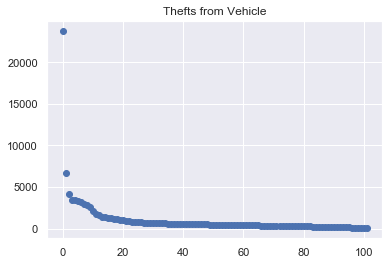

In [180]:
#Visualize the data
plt.plot() 
plt.title('Thefts from Vehicle') 
plt.scatter([i for i in range(len(data))], data['theft_from_vehicle_counts']) 
plt.show()

In [181]:
#one hot encode the data
data_encoded = pd.get_dummies(data)

In [182]:
'''
Finding the optimal value of Epsilon. Algorithm gotten from:
https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc
'''

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(data_encoded)
distances, indices = nbrs.kneighbors(data_encoded)

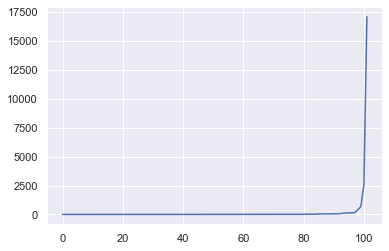

In [183]:
distances = np.sort(distances, axis=0)
distances = distances[:102,1]
plt.plot(distances)

In [184]:
distances

array([1.41421356e+00, 1.41421356e+00, 1.41421356e+00, 1.41421356e+00,
       1.41421356e+00, 1.41421356e+00, 1.41421356e+00, 1.41421356e+00,
       1.41421356e+00, 1.41421356e+00, 1.41421356e+00, 1.41421356e+00,
       1.73205081e+00, 1.73205081e+00, 1.73205081e+00, 1.73205081e+00,
       1.73205081e+00, 1.73205081e+00, 1.73205081e+00, 1.73205081e+00,
       1.73205081e+00, 1.73205081e+00, 2.44948974e+00, 2.44948974e+00,
       2.44948974e+00, 2.44948974e+00, 2.44948974e+00, 2.44948974e+00,
       2.44948974e+00, 2.44948974e+00, 2.44948974e+00, 2.44948974e+00,
       2.44948974e+00, 2.44948974e+00, 2.44948974e+00, 2.44948974e+00,
       3.31662479e+00, 3.31662479e+00, 3.31662479e+00, 3.31662479e+00,
       3.31662479e+00, 3.31662479e+00, 4.24264069e+00, 4.24264069e+00,
       4.24264069e+00, 4.24264069e+00, 4.24264069e+00, 5.19615242e+00,
       5.19615242e+00, 6.16441400e+00, 6.16441400e+00, 6.16441400e+00,
       6.16441400e+00, 6.16441400e+00, 6.16441400e+00, 7.14142843e+00,
      

In [213]:
model = DBSCAN(eps = 44.0227214, min_samples = 10).fit(data_encoded)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool) 
core_samples_mask[db.core_sample_indices_] = True

In [214]:
labels = model.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

In [215]:
n_clusters_

3

In [216]:
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2, -1, -1, -1],
      dtype=int64)

In [219]:
data_encoded

,theft_from_vehicle_counts,Neighborhood_Arbutus Ridge,Neighborhood_Central Business District,Neighborhood_Dunbar-Southlands,Neighborhood_Fairview,Neighborhood_Grandview-Woodland,Neighborhood_Hastings-Sunrise,Neighborhood_Kensington-Cedar Cottage,Neighborhood_Kerrisdale,Neighborhood_Killarney,...,Neighborhood_virginia-village,Neighborhood_washington-park,Neighborhood_washington-park-west,Neighborhood_washington-virginia-vale,Neighborhood_wellshire,Neighborhood_west-colfax,Neighborhood_west-highland,Neighborhood_westwood,Neighborhood_whittier,Neighborhood_windsor
0,23777,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6680,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4121,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3439,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3427,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,138,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99,134,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100,107,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
101,107,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [221]:
data['cluster'] = labels
data.head()

,Neighborhood,theft_from_vehicle_counts,cluster
0,Central Business District,23777,-1
1,West End,6680,-1
2,Mount Pleasant,4121,-1
3,Strathcona,3439,-1
4,Fairview,3427,-1


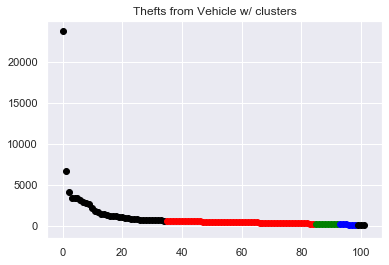

In [225]:
#Plot data with clusters
my_colors = {0:'red', 1:'green', 2:'blue', -1: 'black'}
plt.plot()
plt.title('Thefts from Vehicle w/ clusters')

for idx, sample in enumerate(data.values):
    plt.scatter(idx, sample[1], color=my_colors.get(sample[2]))
        
plt.show()